<a href="https://colab.research.google.com/github/saikumar28102000/THE-SPARK-FOUNDATION/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science and Business Analytics Intern @ The Sparks Foundation

#GRIP MARCH 2021


### Author: SAI KUMAR T S

### Task 4: Exploratory Data Analysis- Terrorism

Problem Statement 1: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
 
Problem Statement 2: As a security/defense analyst, try to find out the hot zone of terrorism.

Problem Statement 3: What all security issues and insights you can derive by EDA?

##### Data Import and Pre-processing

In [ ]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        #For plotting graphs
%matplotlib inline                    
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading the data
df=pd.read_csv('globalterrorism.csv')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
#To show total rows and columns
df.shape

(181691, 135)

In [ ]:
# Name of Columns
for col in df.columns:
    print(col)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

In [ ]:
#Renaming the columns for easy identification
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True)
for col in df.columns:
    print(col)

eventid
Year
Month
Day
approxdate
Extended
resolution
country
Country
region
Region
State
City
Latitude
Longitude
specificity
vicinity
location
Summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
AttackType
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
Target_type
targsubtype1
targsubtype1_txt
corp1
Target
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
Group
gsubname
gname2
gsubname2
gname3
gsubname3
Motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
Weapon_type
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weaptype4_txt
weapsubtype4
wea

In [ ]:
#Keeping only necessary columns
df= df[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude',
                 'AttackType','Killed','Wounded','Group','Target_type','Weapon_type']]
df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,Unknown,Government (Diplomatic),Incendiary


In [ ]:
df.shape

(181691, 15)

In [ ]:
# To check any Null Values
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
Latitude        4556
Longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Group              0
Target_type        0
Weapon_type        0
dtype: int64

In [ ]:
#Replacing the missing values
df['State'].fillna(df['State'].mode()[0], inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['Killed'].fillna(df['Killed'].mode()[0], inplace=True)
df['Wounded'].fillna(df['Wounded'].mode()[0], inplace=True)
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
State          0
Region         0
City           0
Latitude       0
Longitude      0
AttackType     0
Killed         0
Wounded        0
Group          0
Target_type    0
Weapon_type    0
dtype: int64

In [ ]:
# To check any duplicate rows
df.duplicated().sum()

13981

In [ ]:
#dropping those duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
#check again to make sure duplicated rows has been dropped
df.duplicated().sum()


0

In [ ]:
#Saving the cleaned data into a new csv file
df.to_csv('Terrorism.csv', header=True, index=False)

##### Basic Statistical Details

In [ ]:
# Statistical Details 
df .describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,167710.000000,167710.000000,167710.000000,167710.000000,1.677100e+05,167710.000000,167710.000000
mean,2003.161773,6.470640,15.525240,23.849496,-4.953943e+02,2.417924,3.074772
std,13.134263,3.391428,8.813982,17.951299,2.104538e+05,11.649760,35.683704
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,12.165135,3.670160e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.250196,4.329566e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.516895,6.877814e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [ ]:
#no.of distinct values
df.nunique()

Year              47
Month             13
Day               32
Country          205
State           2854
Region            12
City           36674
Latitude       48323
Longitude      48040
AttackType         9
Killed           205
Wounded          238
Group           3537
Target_type       22
Weapon_type       12
dtype: int64

### Data Visualization

##### Terror Attacks over the years

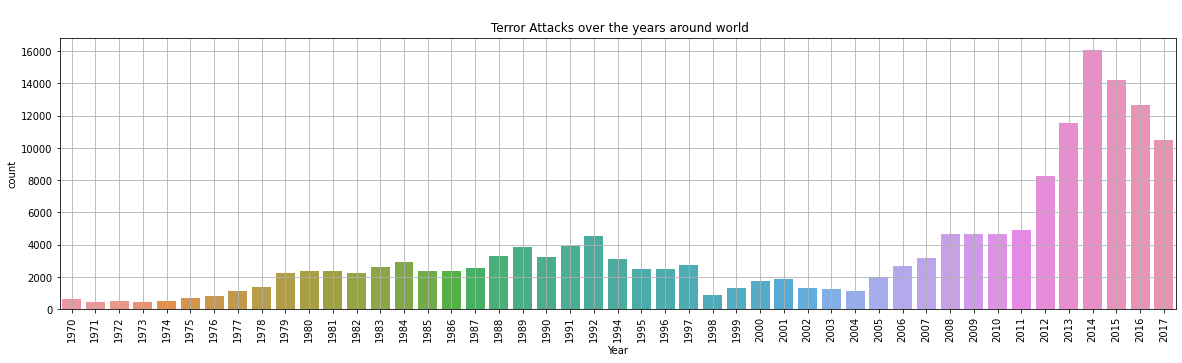

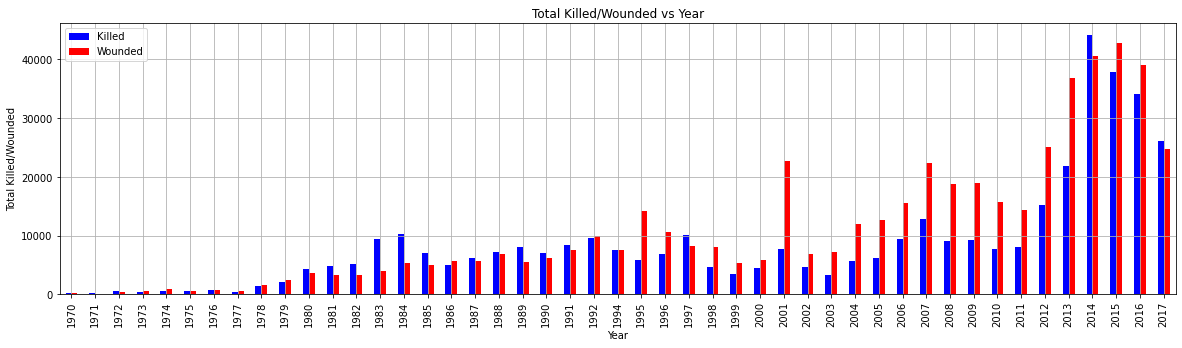

In [ ]:
#Terror Attacks over the years around world
plt.figure(figsize=(20,5)) 
sns.countplot(x=df['Year'],data=df)
plt.xticks(rotation=90)
plt.title("\n Terror Attacks over the years around world")
plt.grid()
plt.show()

#Total Killed/Wounded vs Year
df.groupby('Year')['Killed','Wounded'].sum().plot.bar(color=['b','r'],figsize=(20,5))
plt.ylabel("Total Killed/Wounded")
plt.title('Total Killed/Wounded vs Year')
plt.grid()


- Terror attacks were maximum during 2014.approximately 16000 attacks in this year.This means that around 45 attacks were happening every single day in multiple locations around the world during 2014. After 2014, terror attacks show a downward trend. 

- High casuality rate during the year 2014.From(2015-17),casuality rate (killed+wounded) falls down

##### Countries Affected by Terrorist Attacks

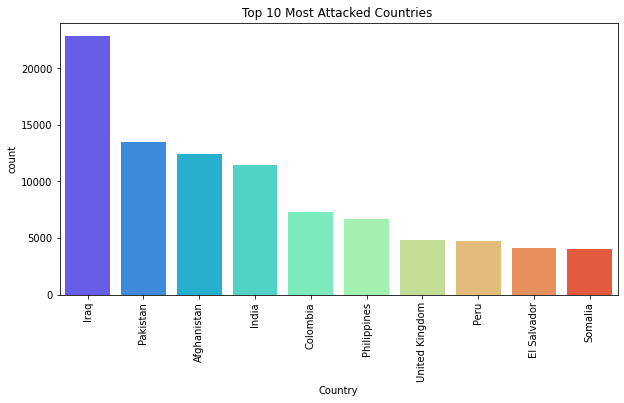

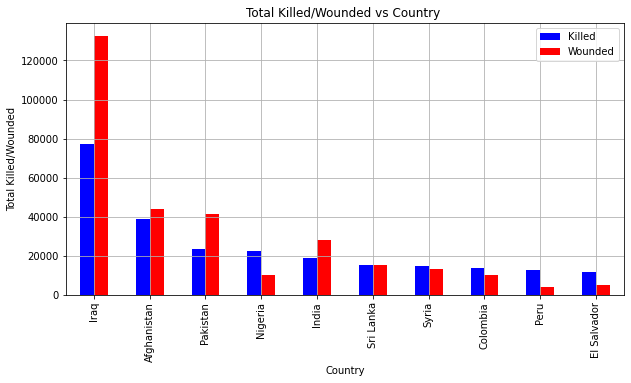

In [ ]:
#Top 10 most attacked Countries
plt.figure(figsize=(10,5)) 
sns.countplot(x=df['Country'],data=df,order= df['Country'].value_counts().head(10).index,palette='rainbow')
plt.xticks(rotation=90)
plt.title('Top 10 Most Attacked Countries ')

#Total Killed/Wounded vs Country
df.groupby('Country')['Killed','Wounded'].sum().sort_values(by='Killed',ascending=False).head(10).plot.bar(color=['b','r'],figsize=(10,5))
plt.ylabel("Total Killed/Wounded")
plt.title('Total Killed/Wounded vs Country ')
plt.grid()

- Iraq was the most targeted country followed by Pakistan,Afghanistan and India respectively
- From(1970-2017),total killed/wounded number was high in Iraq followed by Afghanistan.

Text(0.5, 1.0, 'Terror attacks over the years in Iraq ')

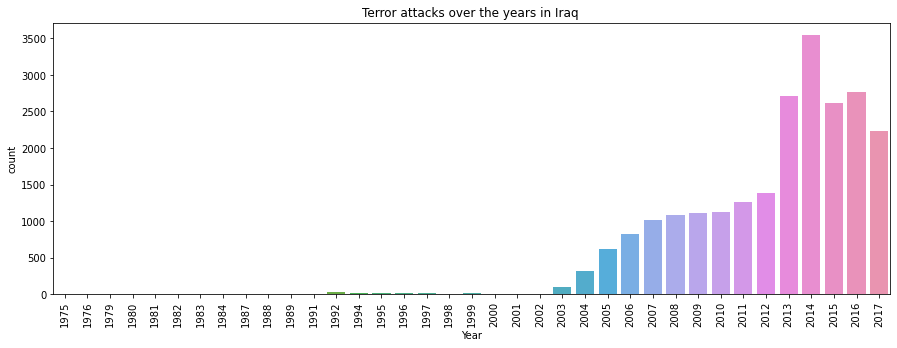

In [ ]:
#Terror attacks over the years in Iraq
df1= df[df["Country"]=='Iraq']
plt.figure(figsize=(15,5)) 
sns.countplot(x=df1['Year'],data=df1)
plt.xticks(rotation=90)
plt.title('Terror attacks over the years in Iraq ')


- In Iraq, terror has started gaining since 2003, and steadily increases till 2012. Then there is a drastic increase in the next two years.Terror attack is maximum in 2014 and have started showing a downward trend.However even during 2017,the terror is still high

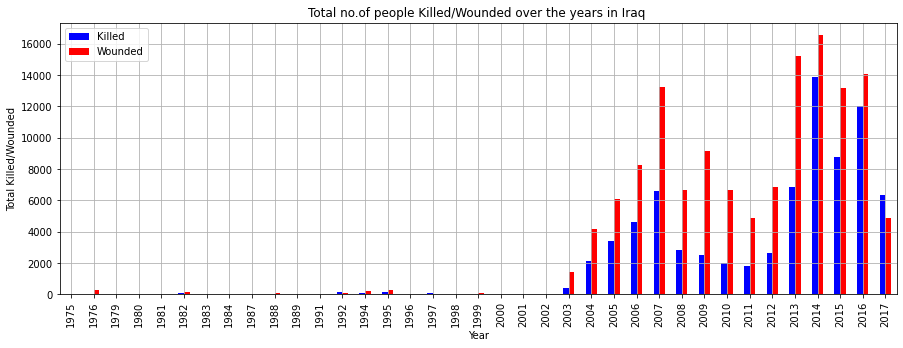

In [ ]:
#Total no.of people Killed/Wounded  over the years in Iraq
df1.groupby('Year')['Killed','Wounded'].sum().plot.bar(color=['b','r'],figsize=(15,5))
plt.ylabel("Total Killed/Wounded")
plt.title('Total no.of people Killed/Wounded over the years in Iraq ')
plt.grid()

- Terror attacks are maximum in 2014. Around 16000 were wounded and around 14000 were killed during this year

##### States Affected by Terrorist Attacks

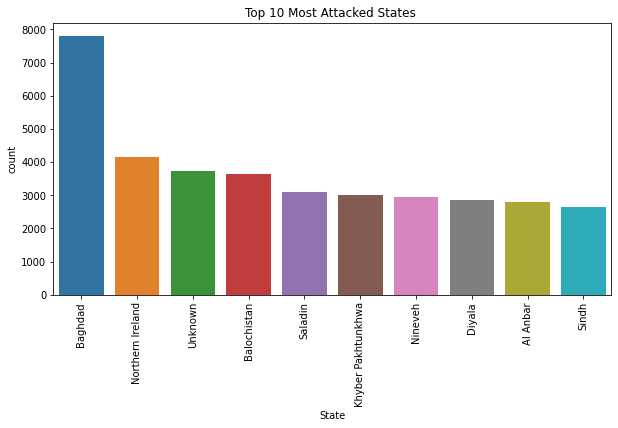

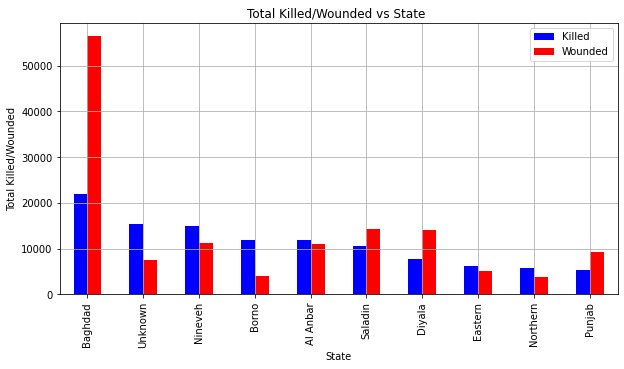

In [ ]:
#Top 10 most attacked Countries
plt.figure(figsize=(10,5)) 
sns.countplot(x=df['State'],data=df,order= df['State'].value_counts().head(10).index)
plt.xticks(rotation=90)
plt.title('Top 10 Most Attacked States ')

#Total Killed/Wounded vs State
df.groupby('State')['Killed','Wounded'].sum().sort_values(by='Killed',ascending=False).head(10).plot.bar(color=['b','r'],figsize=(10,5))
plt.ylabel("Total Killed/Wounded")
plt.title('Total Killed/Wounded vs State ')
plt.grid()

- Baghdad was the most attacked state. Around 25000 were killed and 50000+ were wounded here till 2017.

Text(0.5, 1.0, 'Terror attacks over the years in Baghdad ')

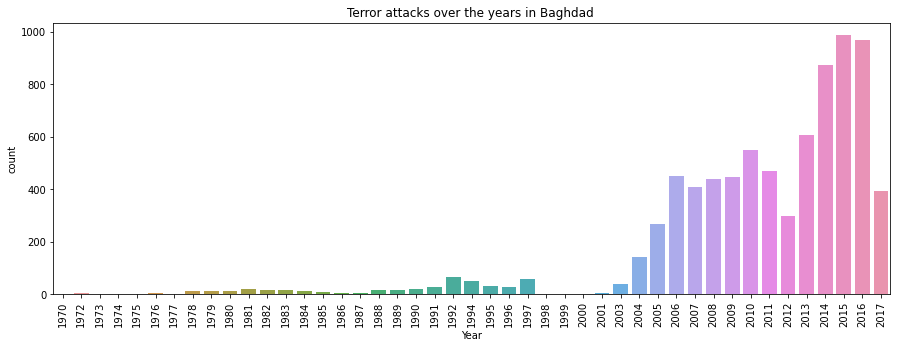

In [ ]:
#Terror attacks over the years in Baghdad
df2= df[df["State"]=='Baghdad']
plt.figure(figsize=(15,5)) 
sns.countplot(x=df2['Year'],data=df2)
plt.xticks(rotation=90)
plt.title('Terror attacks over the years in Baghdad ')


- In Baghdad, terror attacks were maximum during (2014-16) and have declined considerably during 2017

##### Regions Affected by Terrorist Attacks

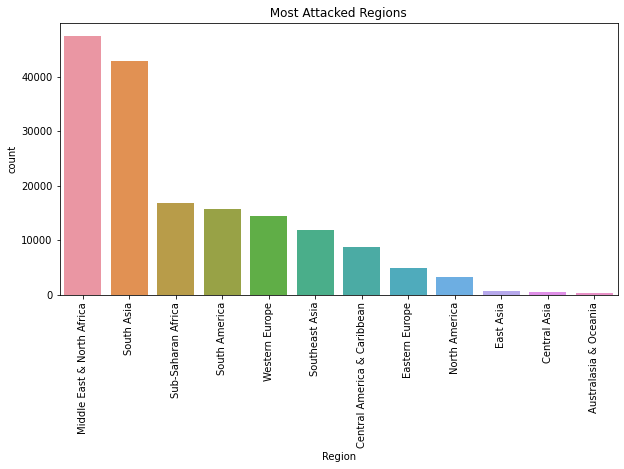

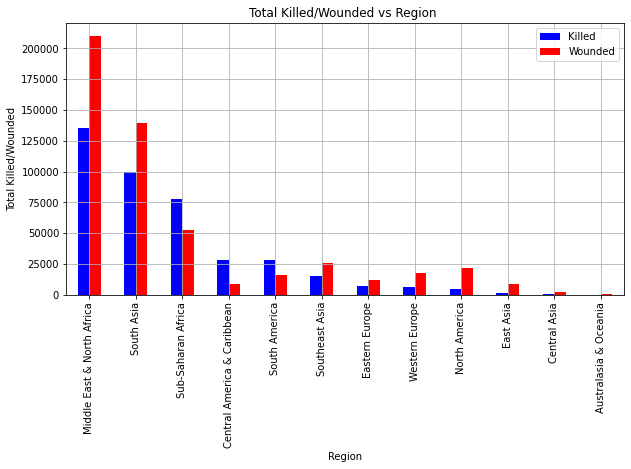

In [ ]:
plt.figure(figsize=(10,5)) 
sns.countplot(x=df['Region'],data=df,order= df['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title(' Most Attacked Regions ')

#Total Killed/Wounded vs Region
df.groupby('Region')['Killed','Wounded'].sum().sort_values(by='Killed',ascending=False).plot.bar(color=['b','r'],figsize=(10,5))
plt.ylabel("Total Killed/Wounded")
plt.title('Total Killed/Wounded vs Region ')
plt.grid()

- Middle East& North Africa was the most attacked region.Around 125000+ were killed and 200000+ were wounded here till 2017.

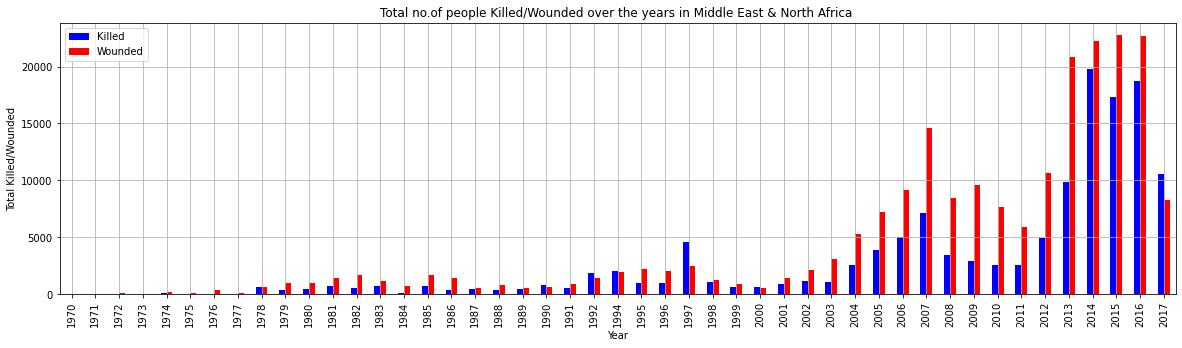

In [ ]:
#Total no.of people Killed/Wounded  over the years in Middle East & North Africa
df[df["Region"]=='Middle East & North Africa'].groupby('Year')['Killed','Wounded'].sum().plot.bar(color=['b','r'],figsize=(20,5))
plt.ylabel("Total Killed/Wounded")
plt.title('Total no.of people Killed/Wounded over the years in Middle East & North Africa ')
plt.grid()

- In Middle East & North Africa, most of the people were wounded during 2015 and 2016.
- Death rate is maximum during 2014

##### Cities Affected by Terrorist Attacks

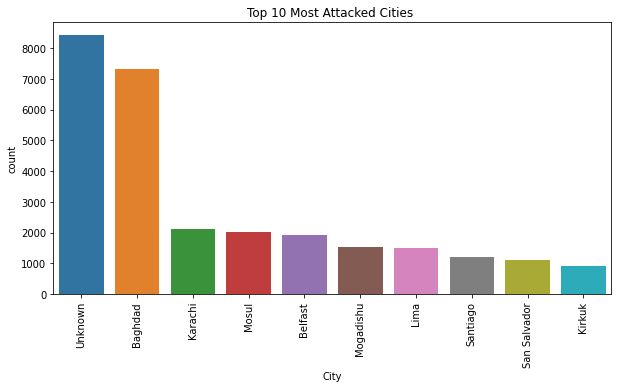

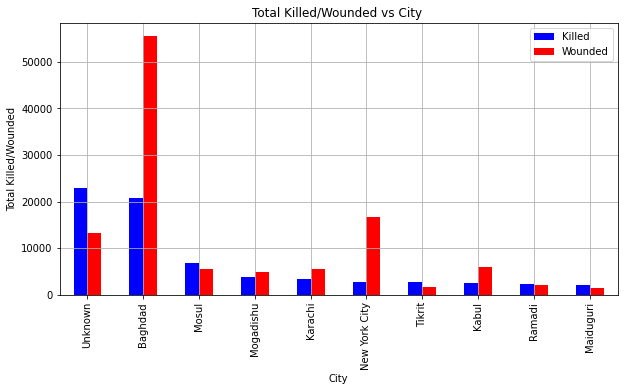

In [ ]:
#Top 10 most attacked Cities
plt.figure(figsize=(10,5)) 
sns.countplot(x=df['City'],data=df,order= df['City'].value_counts().head(10).index)
plt.xticks(rotation=90)
plt.title('Top 10 Most Attacked Cities ')

#Total Killed/Wounded vs City
df.groupby('City')['Killed','Wounded'].sum().sort_values(by='Killed',ascending=False).head(10).plot.bar(color=['b','r'],figsize=(10,5))
plt.ylabel("Total Killed/Wounded")
plt.title('Total Killed/Wounded vs City ')
plt.grid()

##### Terrorist Group Analysis :

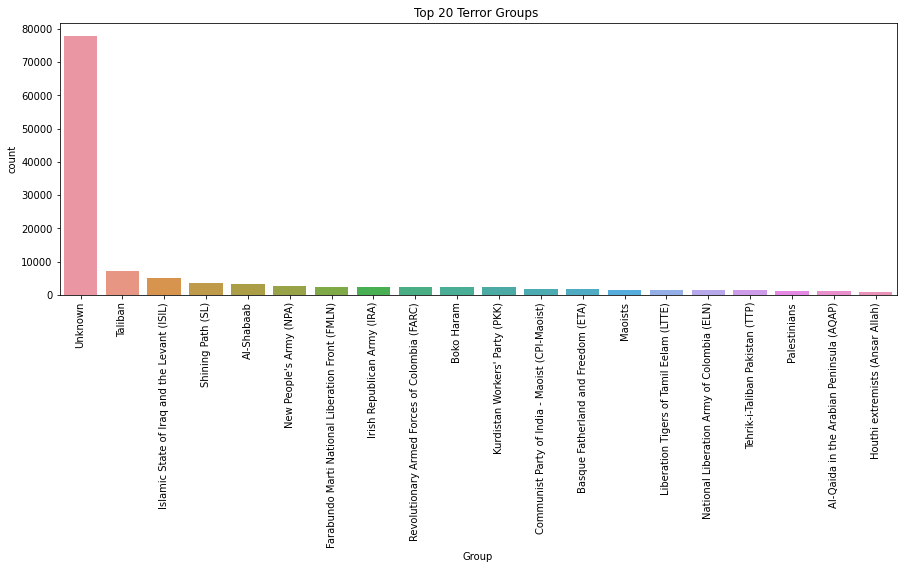

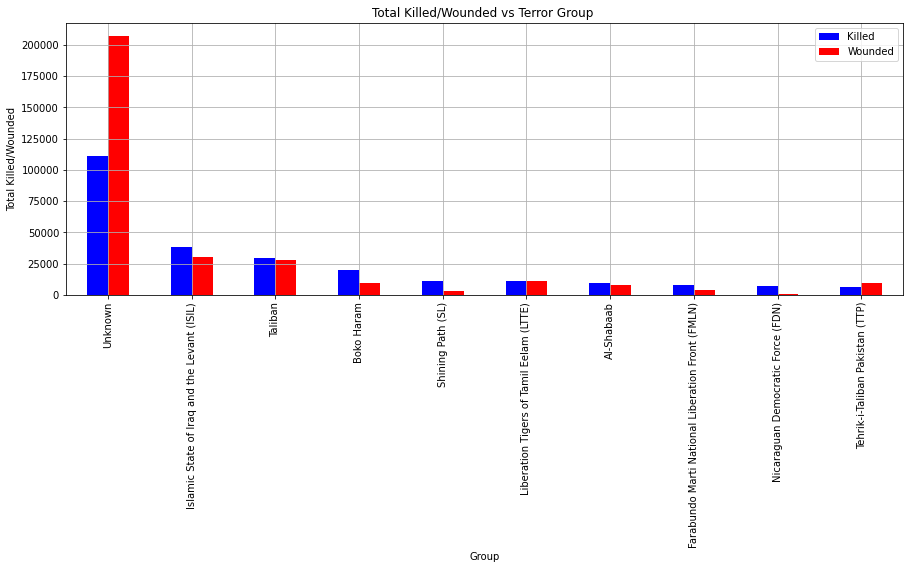

In [ ]:
#Group with most terrorist activities
plt.figure(figsize=(15,5)) 
sns.countplot(x=df['Group'],data=df,order= df['Group'].value_counts().head(20).index)
plt.xticks(rotation=90)
plt.title('Top 20 Terror Groups ')

#Total Killed/Wounded vs Terror Group
df.groupby('Group')['Killed','Wounded'].sum().sort_values(by='Killed',ascending=False).head(10).plot.bar(color=['b','r'],figsize=(15,5))
plt.ylabel("Total Killed/Wounded")
plt.title('Total Killed/Wounded vs Terror Group ')
plt.grid()



- An unknown group is attacking at a huge rate. Hence immediate actions should be taken to find the unknown group. Apart from the unknown group, Taliban has a huge attack rate followed by ISIL. Proper defence measures should be taken against the Taliban group and ISIL.
- Unknown group has highest killing and casuality rate followed by ISIL and Taliban.

##### Attack Types

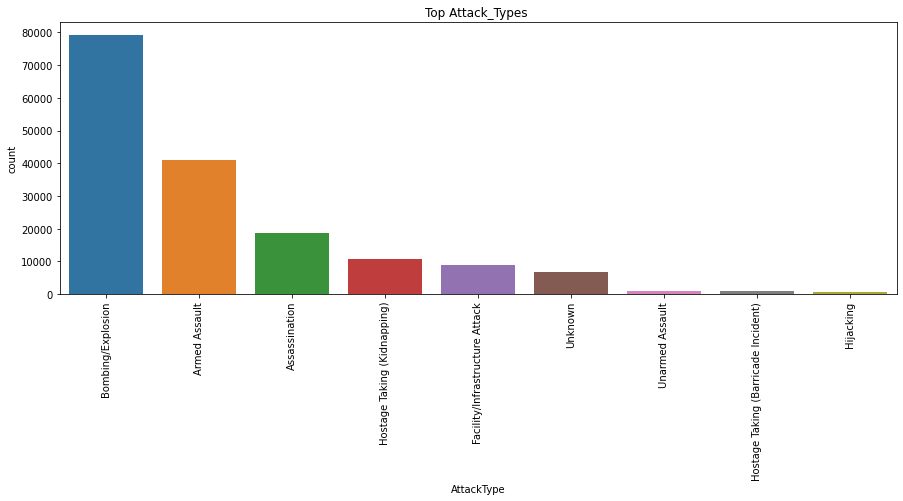

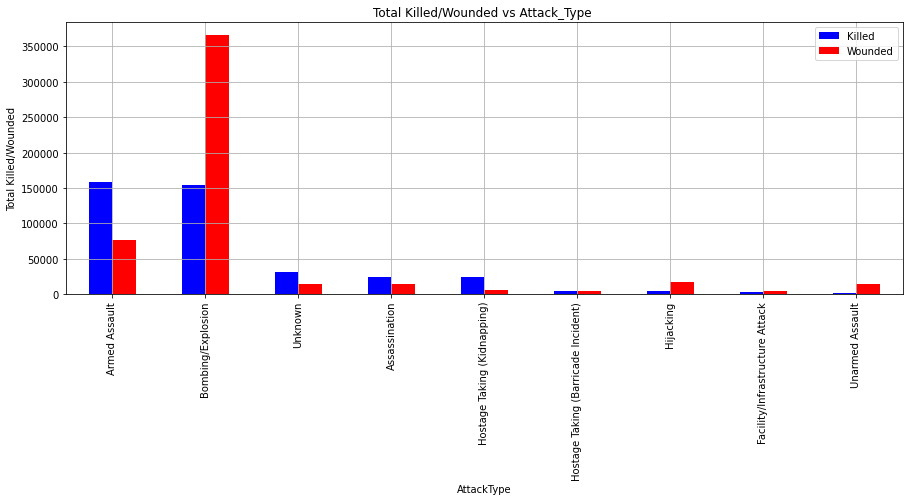

In [ ]:
#Most used Attack types
plt.figure(figsize=(15,5)) 
sns.countplot(x=df['AttackType'],data=df,order= df['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Top Attack_Types ')

#Total Killed/Wounded vs AttackType
df.groupby('AttackType')['Killed','Wounded'].sum().sort_values(by='Killed',ascending=False).plot.bar(color=['b','r'],figsize=(15,5))
plt.ylabel("Total Killed/Wounded")
plt.title('Total Killed/Wounded vs Attack_Type ')
plt.grid()


- Bombing or Explosion is the most frequent Attack_Type used followed by Armed Assault and Assasination.
- Armed Assault caused highest casuality rate followed by Bombing or Explosion
- Security checkings should be made tighter to prevent illegal explosive transactions

##### Target_Type

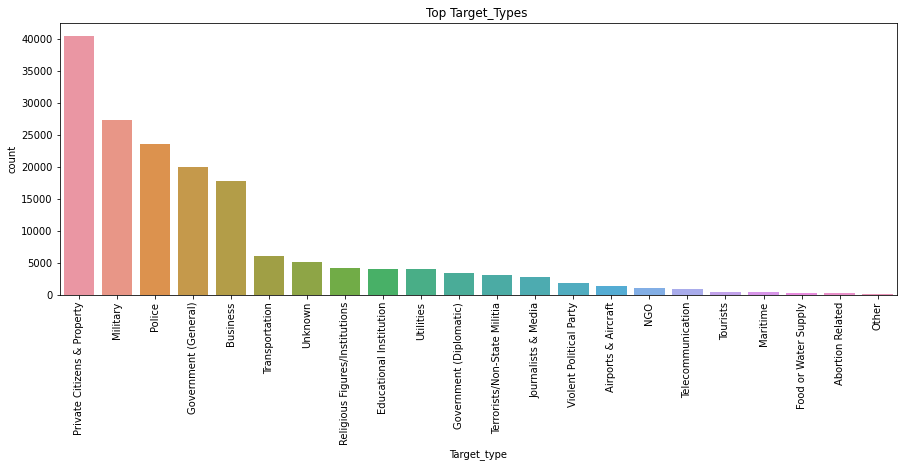

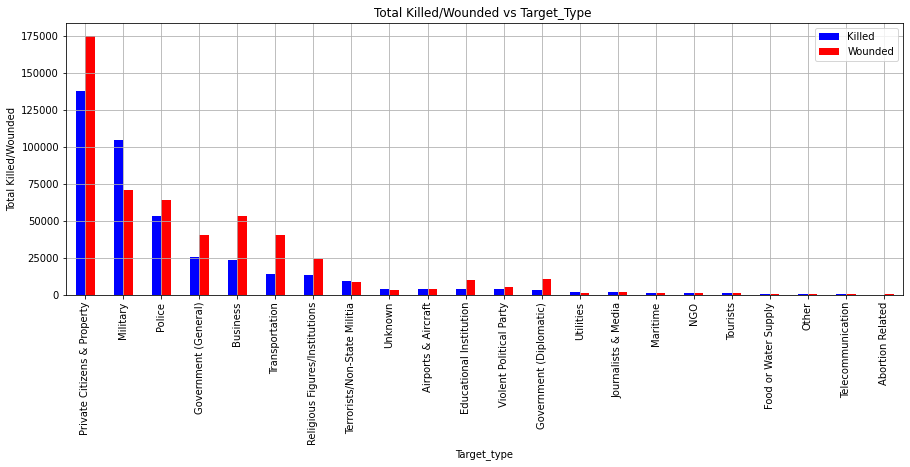

In [ ]:
#Common Weapon types
plt.figure(figsize=(15,5)) 
sns.countplot(x=df['Target_type'],data=df,order= df['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Top Target_Types ')

#Total Killed/Wounded vs AttackType
df.groupby('Target_type')['Killed','Wounded'].sum().sort_values(by='Killed',ascending=False).plot.bar(color=['b','r'],figsize=(15,5))
plt.ylabel("Total Killed/Wounded")
plt.title('Total Killed/Wounded vs Target_Type ')
plt.grid()

- The citizens are the top target in terrorist attacks. Proper safety should be ensured to them. 

### Insights:

- Year 2014 had the most number of terror attacks in the last decade.Approximately 16000 attacks in this year.This means that around 45 attacks were happening every single day in multiple locations around the world during 2014.


- Iraq was the most targeted country and had high casuality (Killed+wounded) rate
- Baghdad was the most attacked state. Around 25000 were killed and 50000+ were wounded here till 2017. Defence system of Iraq should be alert and should take necessary actions againt terror groups


- An unknown group is attacking at a huge rate. Hence immediate actions should be taken to find the unknown group. Apart from the unknown group, Taliban has a huge attack rate followed by ISIL. Proper defence measures should be taken against the Taliban group and ISIL.


- Bombing or Explosion is the most frequent Attack_Type used. Stricter rules and surveillance should be made to prevent the movement of explosives into and from countries


- The citizens are the top target in terror attacks, followed by Military,Police, Government,Transportation etc. Tighter Security and surveillance should be provided, especially in hot zones.